In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [4]:
X_train = np.linspace(-1, 1, 20)

In [6]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [8]:
X_test = np.linspace(-1, 1, 20)

In [10]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

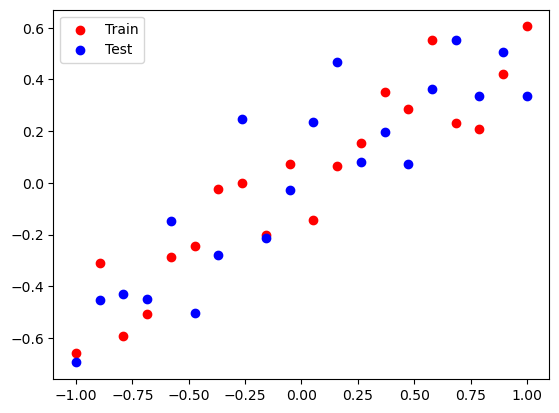

In [12]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression model

In [17]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=True)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1719 - mse: 0.1719 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0479 - val_mse: 0.0479
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.0237 -

In [19]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004025335889309645, Test: 0.04593957960605621


In [21]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


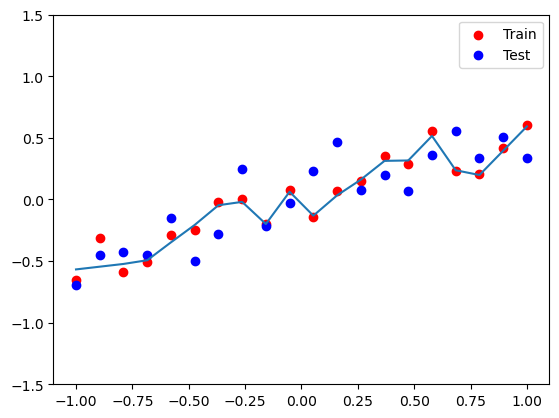

In [23]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [35]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=True)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: 0.1345 - mse: 0.1345 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0297 - mse

In [36]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.013964204117655754, Test: 0.03204020857810974


In [37]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


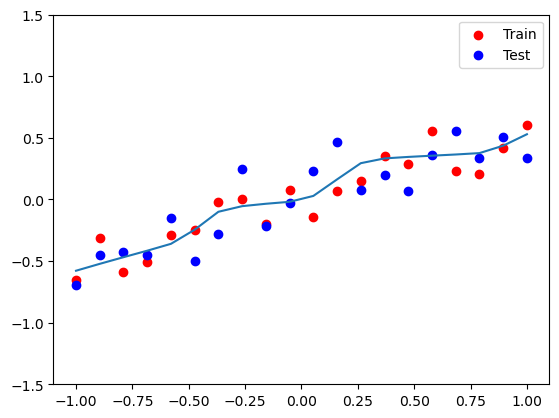

In [38]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()